In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sbn

sbn.set()

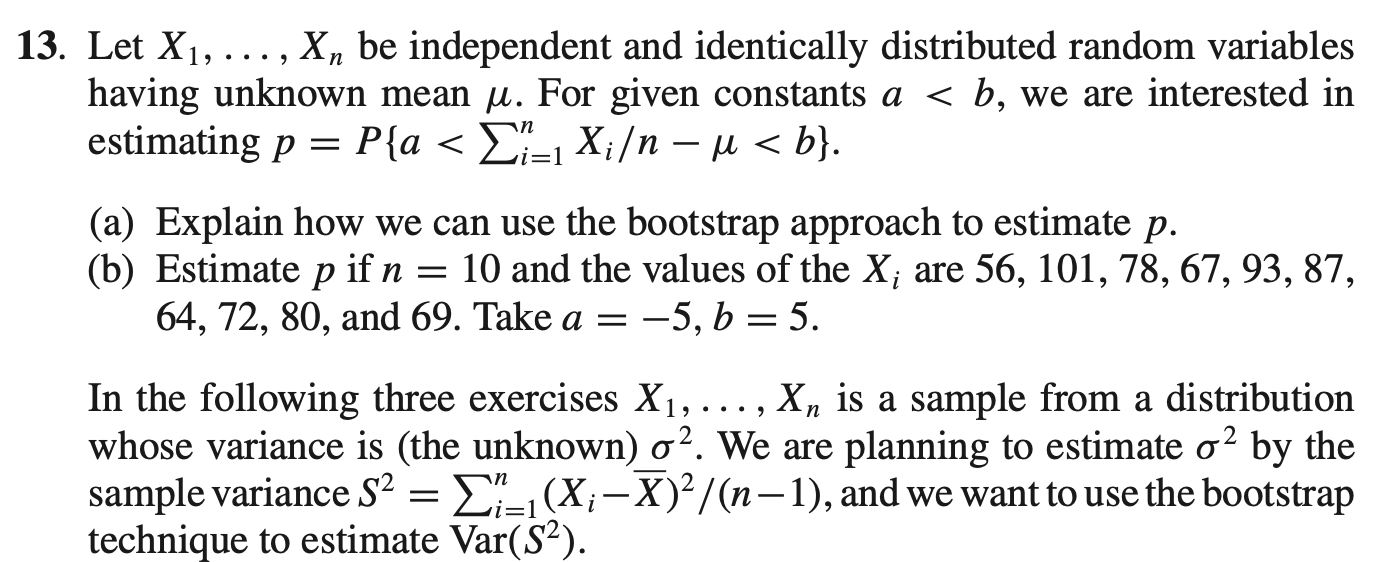

In [13]:
X = np.array([56, 101, 78, 67, 93, 87, 64, 72, 80, 69])
n = len(X)
a = -5
b = 5
K = 100000 # bootstrap samples
mu = np.mean(X)
ps = np.zeros(K)

for k in range(K):
    # Sample n values form X
    X_sample = np.random.choice(X, size = n, replace = True)
    
    # count p
    x = np.sum(X_sample) / n

    p = a < (x - mu) and (x - mu) < b
    
    # add estimate of p to list
    ps[k] = p

P = ps.sum() / K

print(f'Probability of p = {P}')

Probability of p = 0.76231


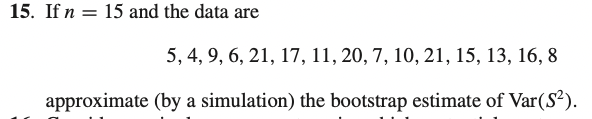

In [21]:
X = np.array([5, 4, 9, 6, 21, 17, 11, 20, 7, 10, 21, 15, 13, 16, 8])
K = 1000
n = len(X)
sample_vars = np.zeros(K)

for k in range(K):
    # Sample
    X_sample = np.random.choice(X, size = n, replace = True)
    S_2 = np.sum((X_sample - X_sample.mean()) ** 2) / ( n - 1 )
    sample_vars[k] = S_2

print(f'Bootstrap estimate of variance: {np.var(sample_vars):.3f}')

Bootstrap estimate of variance: 59.948


<h3> (3) Bootstrap estimate of median for pareto sample </h3>

In [32]:
def bootstrap_median(X, R = 100):
    n = len(X)
    median_ = np.median(X)
    sample_medians = np.zeros(R)

    for r in range(R):
        X_sample = np.random.choice(X, size = n, replace = True)
        sample_medians[r] = np.median(X_sample)

    return median_, np.var(sample_medians)


def bootstrap_mean(X, R = 100):
    n = len(X)
    mu = X
    sample_means = np.zeros(n)

    for r in range(R):
        X_sample = np.random.choice(X, size = n, replace = True)
        sample_means[r] = np.mean(X_sample)

    return mu, np.var(sample_means)

N = 200

X = stats.pareto.rvs(1.05, 1, size = N)

# a) mean and median
print(f'Median: {np.median(X)}, mean: {np.mean(X)}')

# b) boostrap variance of mean
_, mean_ = bootstrap_mean(X)
print(f'Bootstrap estimate of variance of mean: {mean_}')

# c) boostrap variance of median
_, median_ = bootstrap_median(X)
print(f'Bootstrap estimate of variance of median: {median_}')



Median: 2.8069947561003827, mean: 8.05961133750623
Bootstrap estimate of variance of mean: 18.74735188717975
Bootstrap estimate of variance of median: 0.015952653700101512


The variance of the median is much lower than the variance of the mean.